In [39]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Importar todos os arquivos do dataset e criar um dataframe único com todas as informações:

meses = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path('dataset')

base_airbnb_df = pd.DataFrame()

dataframes = []

for arquivo in caminho_bases.iterdir():
    mes = meses[arquivo.name[:3]]
    ano = int((arquivo.name[-8:]).replace('.csv', ''))
    
    df = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
    df['ano'] = ano
    df['mes'] = mes
    
    dataframes.append(df)

base_airbnb_df = pd.concat(dataframes)
display(base_airbnb_df)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


In [ ]:
#Criar arquivo csv para limpeza inicial:
base_airbnb_df.head(1000).to_csv('primeiros_registros.csv', sep=';')

In [41]:
#Após análise e limpeza inicial obtivemos as seguintes colunas:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb_df = base_airbnb_df.loc[:,colunas]

display(base_airbnb_df)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34325,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34326,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
34327,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


In [42]:
#Verificando dados faltando:
base_airbnb_df.isnull().sum()

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

In [43]:
#Excluindo colunas com mais de 300 mil valores vazios:
for coluna in base_airbnb_df:
    if base_airbnb_df[coluna].isnull().sum() > 300000:
        base_airbnb_df = base_airbnb_df.drop(coluna, axis=1)

In [44]:
#Excluindo linhas vazias:
base_airbnb_df = base_airbnb_df.dropna()

In [45]:
print(base_airbnb_df.dtypes)
print('-'*60)
print(base_airbnb_df.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

In [46]:
#Atualizar as colunas price e extra_people para que sejam reconhecidas como números:
base_airbnb_df[['price', 'extra_people']] = base_airbnb_df[['price', 'extra_people']].apply(lambda x: x.str.replace('$', '', regex=True).str.replace(',', '').astype(np.float32, copy=False))

<AxesSubplot:>

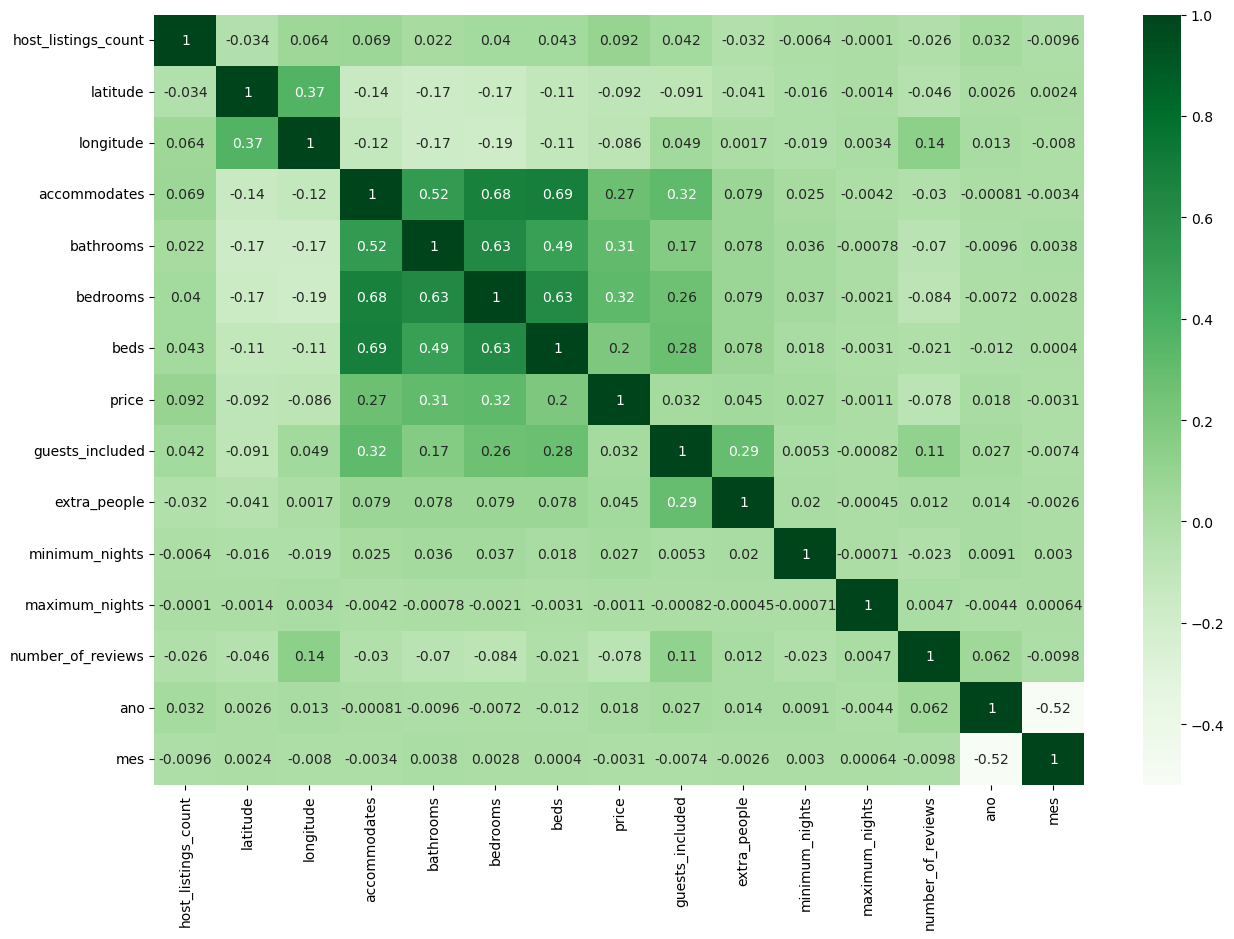

In [47]:
#Analisando a correlação entre as colunas:
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb_df.corr(), annot=True, cmap='Greens')

In [48]:
#Funções para ajudar na análise dos outliers das colunas:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

#Funções para construir os gráficos:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

d:\Users\diego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


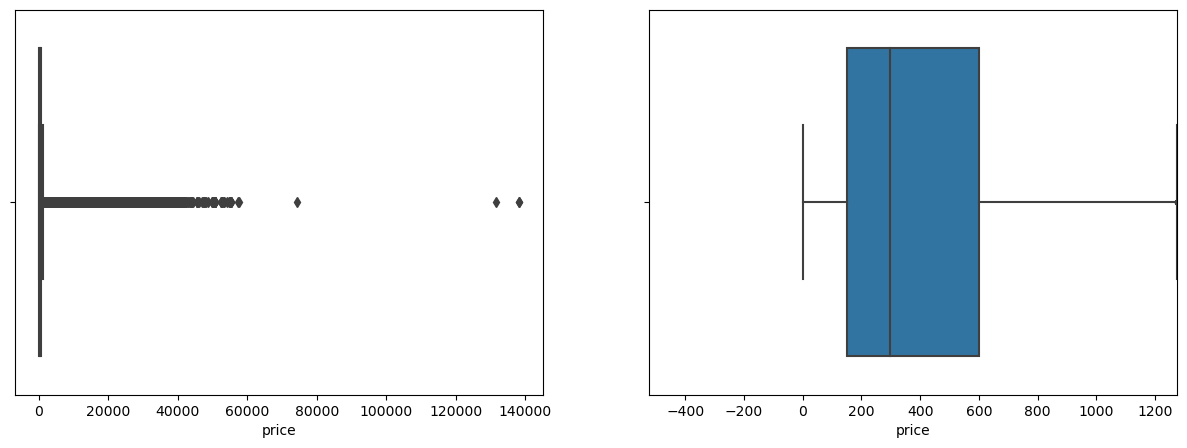

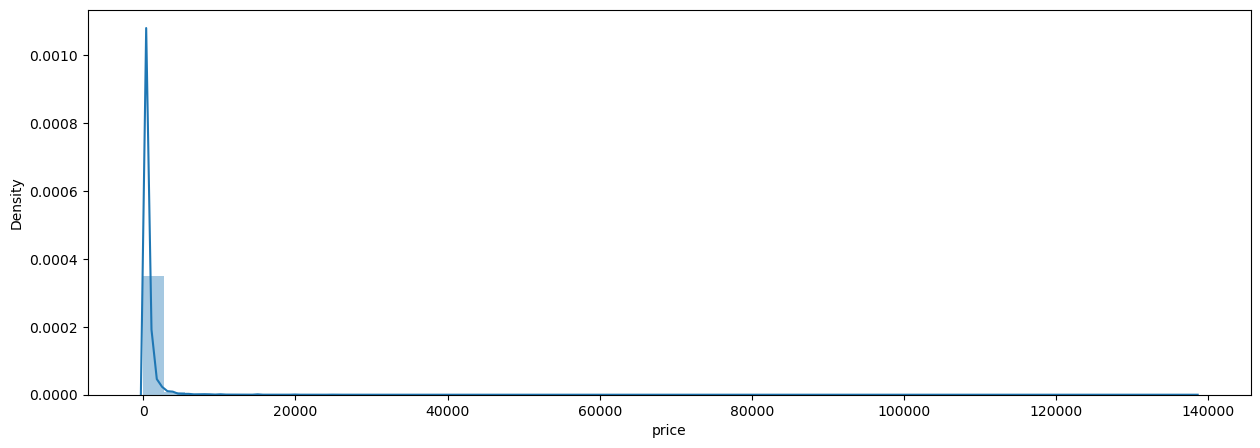

In [49]:
#price:
diagrama_caixa(base_airbnb_df['price'])
histograma(base_airbnb_df['price'])

In [50]:
#Como o modelo que está sendo construído é para imóveis comuns, os valores acima do limite superior devem ser apenas de imóveis de altíssimo luxo, que não condiz com o objetivo principal do modelo. Por isso esses outliers serão excluídos.

base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'price')
print(f'{linhas_removidas} linhas removidas.')

87282 linhas removidas.


d:\Users\diego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


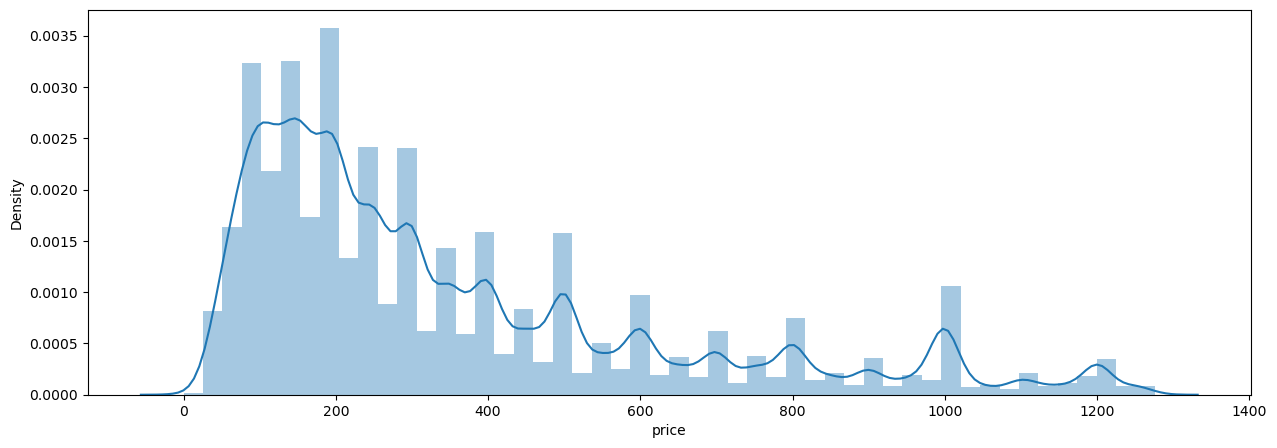

In [51]:
histograma(base_airbnb_df['price'])

d:\Users\diego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


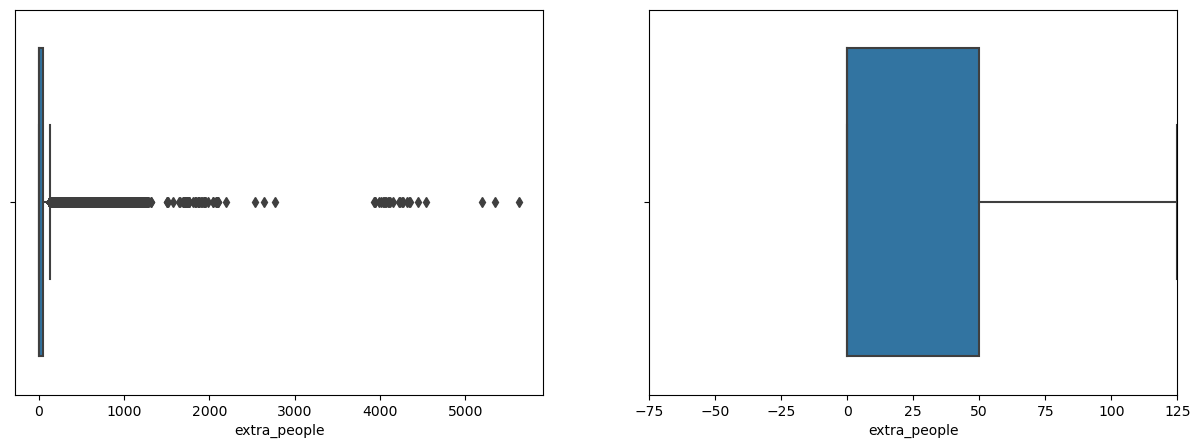

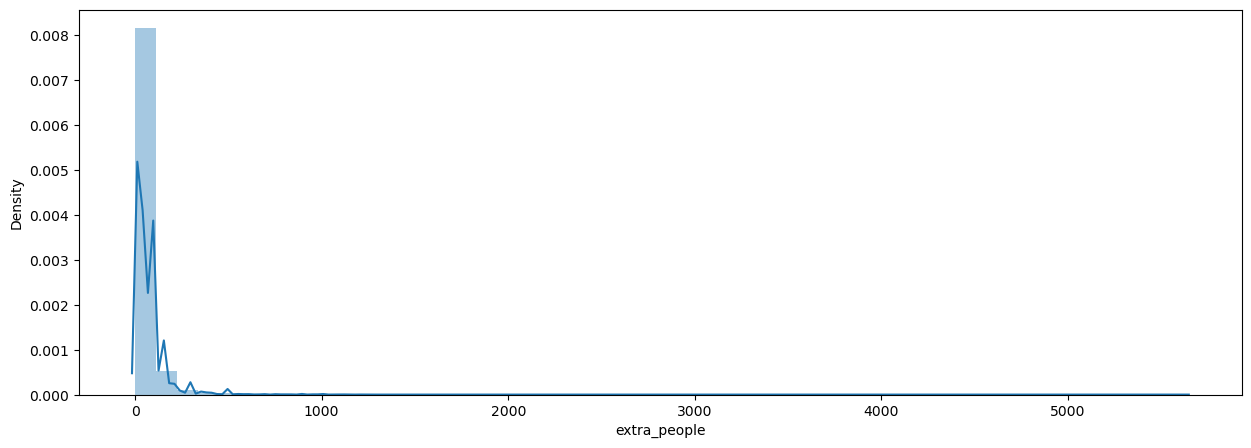

In [52]:
#extra_people:
diagrama_caixa(base_airbnb_df['extra_people'])
histograma(base_airbnb_df['extra_people'])

In [53]:
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'extra_people')
print(f'{linhas_removidas} linhas removidas.')

59194 linhas removidas.


d:\Users\diego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


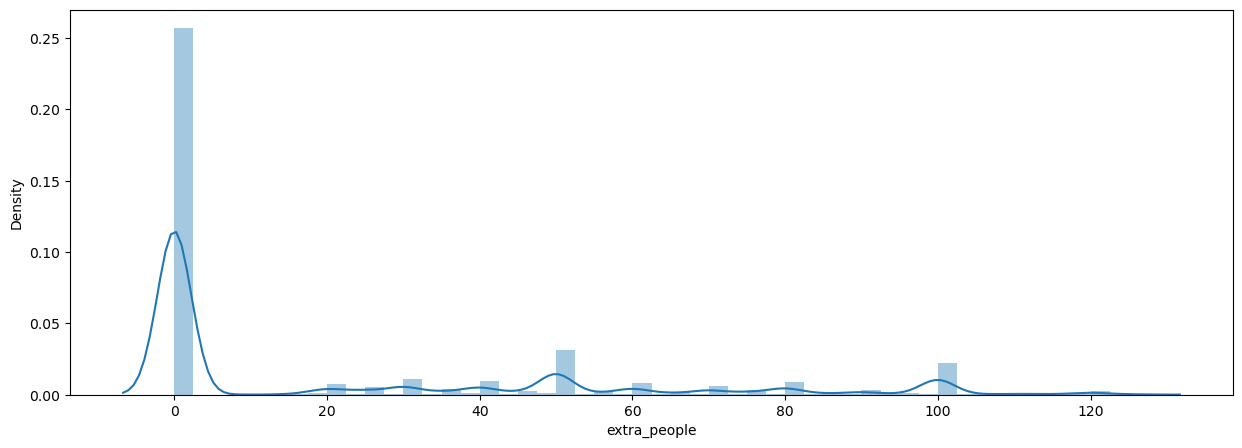

In [54]:
histograma(base_airbnb_df['extra_people'])

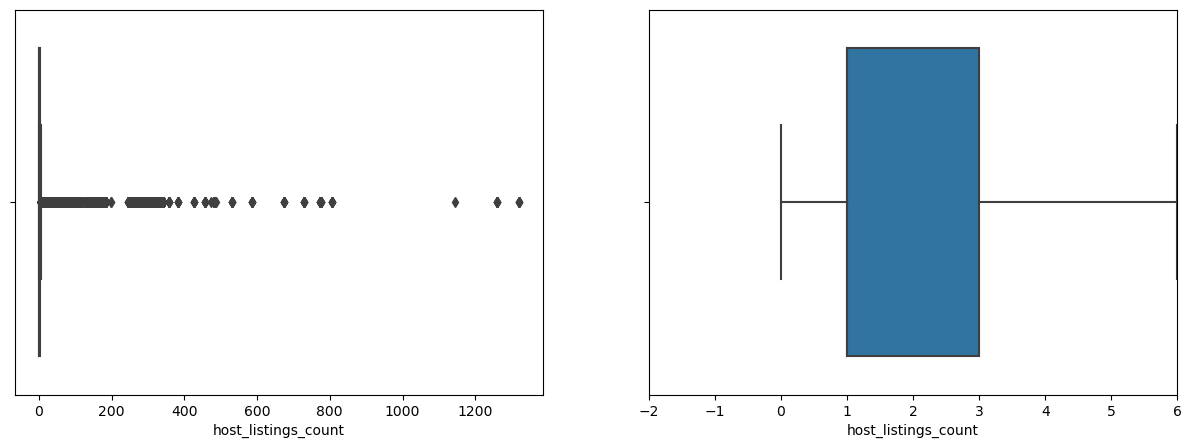

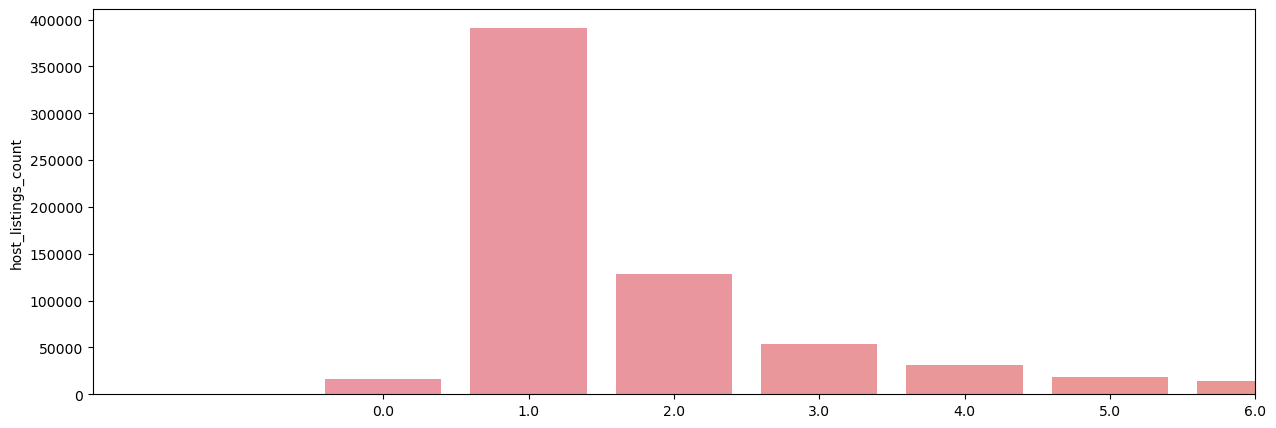

In [55]:
#host_listing_count:

diagrama_caixa(base_airbnb_df['host_listings_count'])
grafico_barra(base_airbnb_df['host_listings_count'])

In [56]:
#Como o modelo que está sendo construído é para imóveis de proprietários comuns, hosts com mais de 6 imóveis devem pertencer a imobiliárias ou profissionais que gerenciam imóveis no airbnb. Por isso esses outliers serão excluídos.

base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'host_listings_count')
print(f'{linhas_removidas} linhas removidas.')

97723 linhas removidas.


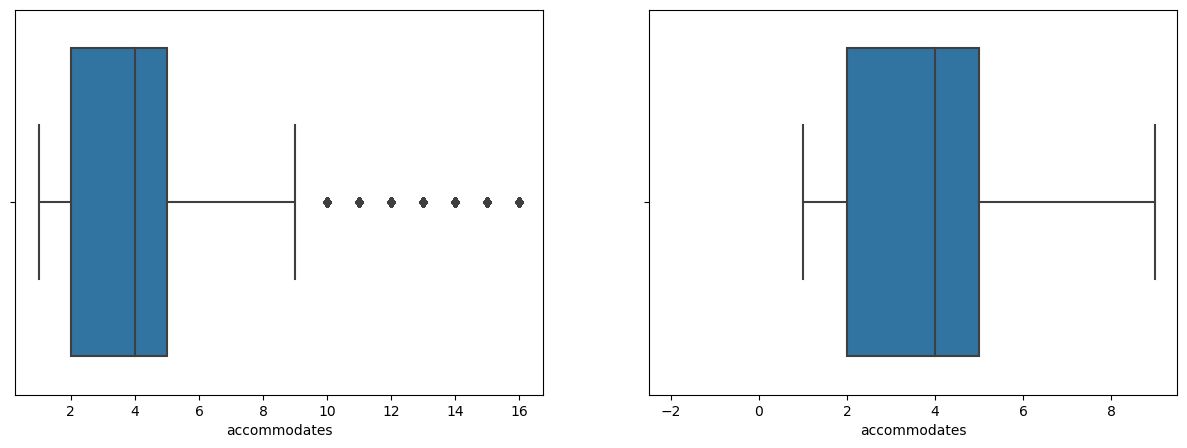

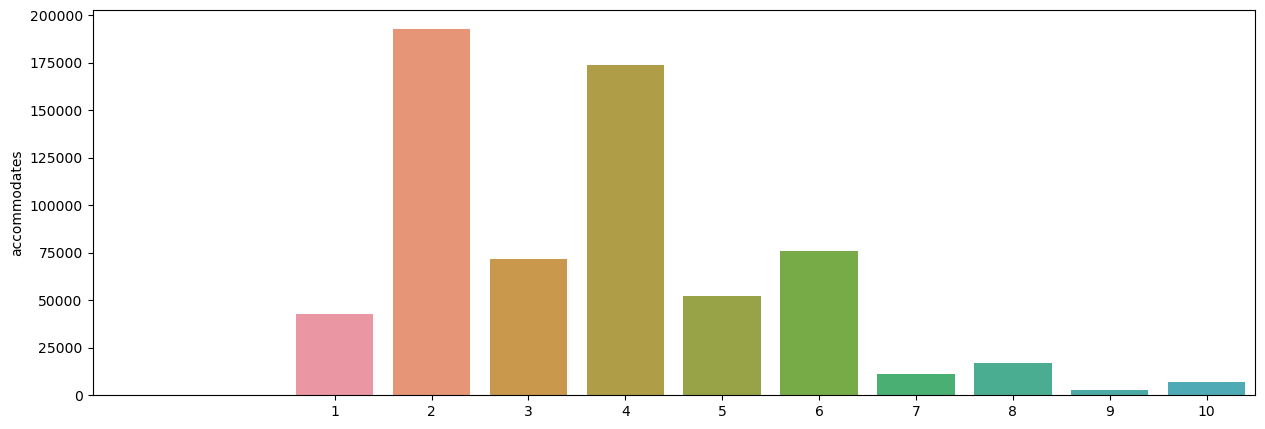

In [57]:
#accommodates:

diagrama_caixa(base_airbnb_df['accommodates'])
grafico_barra(base_airbnb_df['accommodates'])

In [58]:
#Excluindo da análise casas que fujam do "padrão comum", assim como os "host_listing_count". Presume-se que um imóvel que acomode mais de 9 pessoas fuja do foco e do objetivo de analisar hospedagens comuns.

base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'accommodates')
print(f'{linhas_removidas} linhas removidas.')

13146 linhas removidas.


<AxesSubplot:ylabel='bathrooms'>

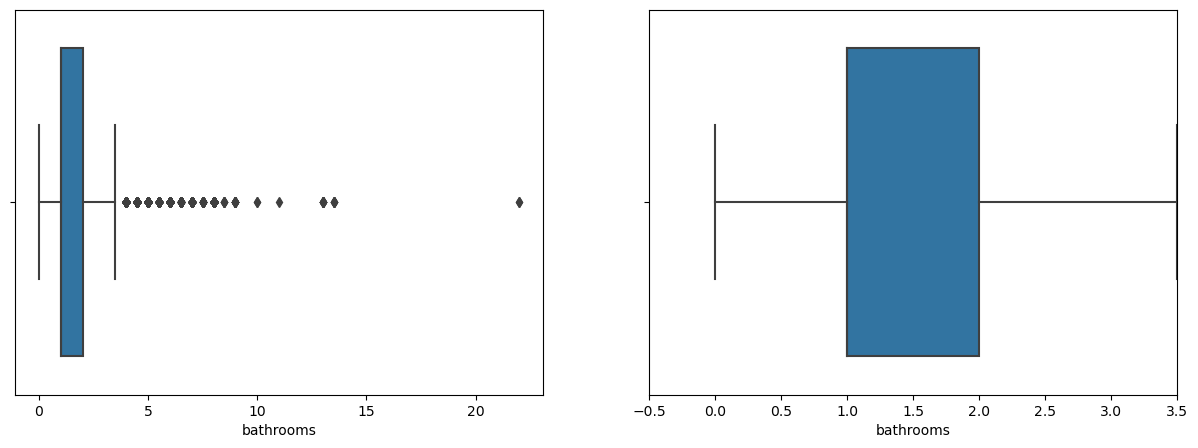

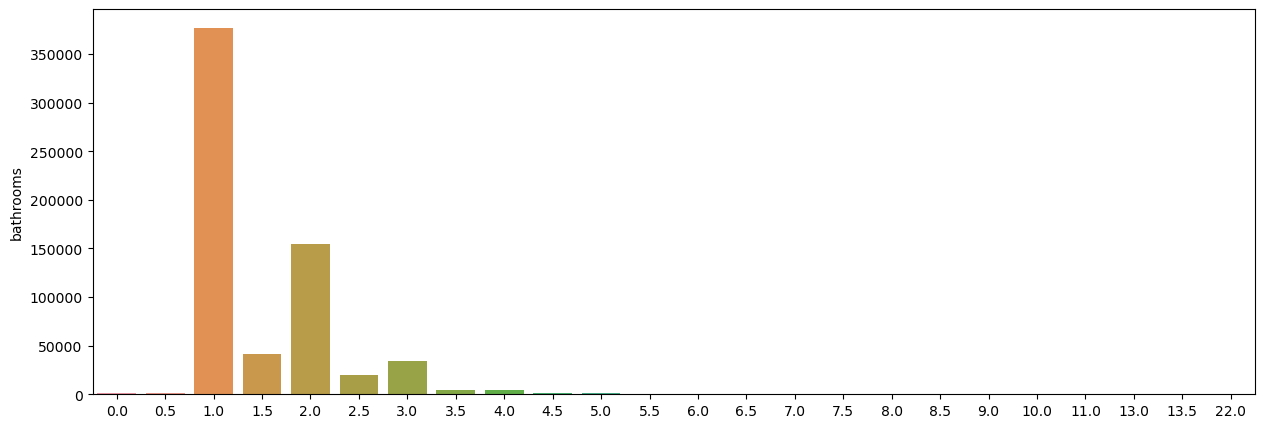

In [59]:
#bathrooms:

diagrama_caixa(base_airbnb_df['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb_df['bathrooms'].value_counts().index, y=base_airbnb_df['bathrooms'].value_counts())

In [60]:
#Excluindo da análise casas que fujam do "padrão comum"

base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'bathrooms')
print(f'{linhas_removidas} linhas removidas.')

6894 linhas removidas.


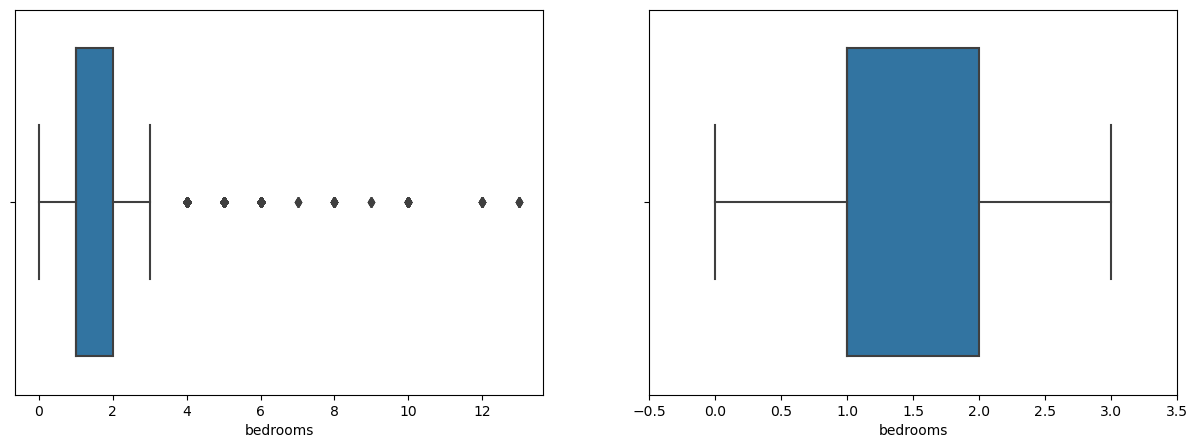

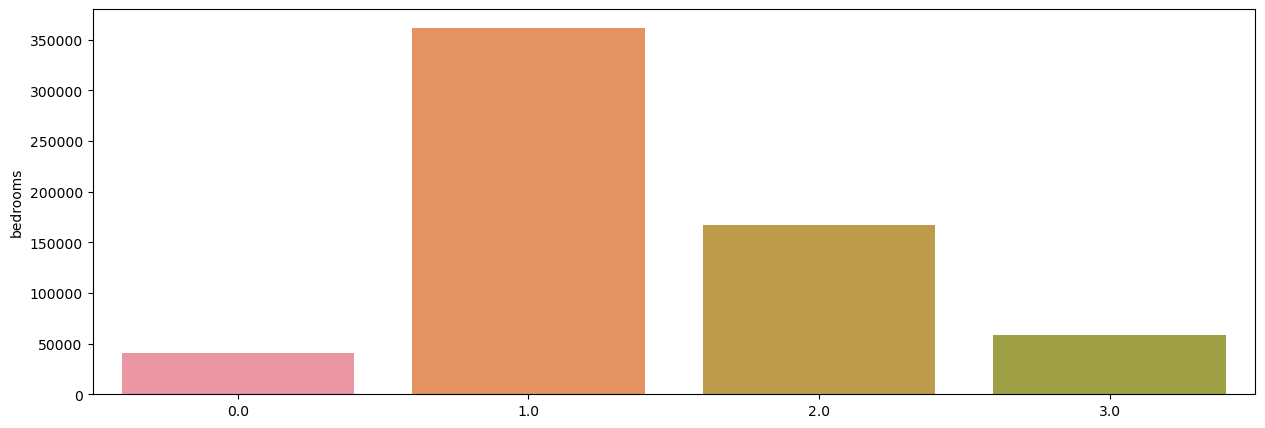

In [61]:
#bedroms
diagrama_caixa(base_airbnb_df['bedrooms'])
grafico_barra(base_airbnb_df['bedrooms'])

In [62]:
#Excluindo da análise casas que fujam do "padrão comum":
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'bedrooms')
print(f'{linhas_removidas} linhas removidas')

5482 linhas removidas


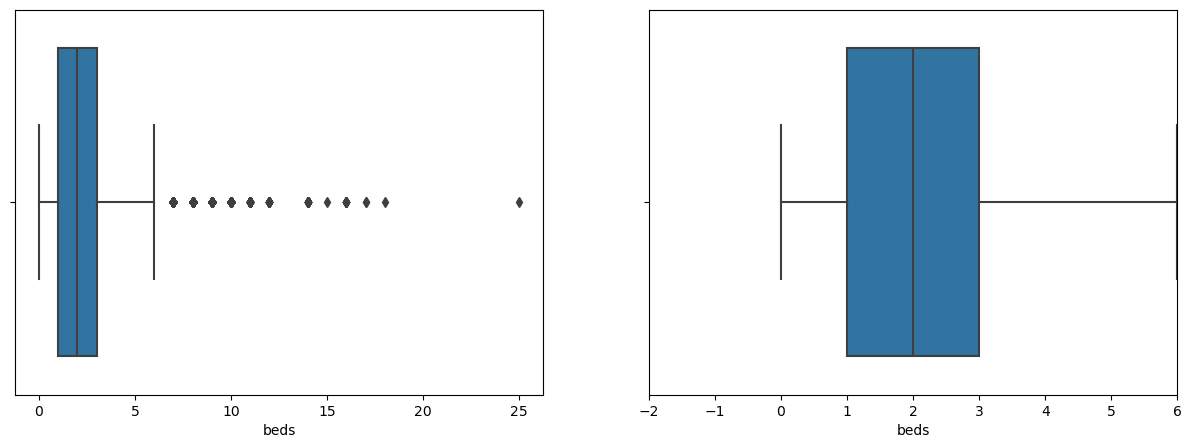

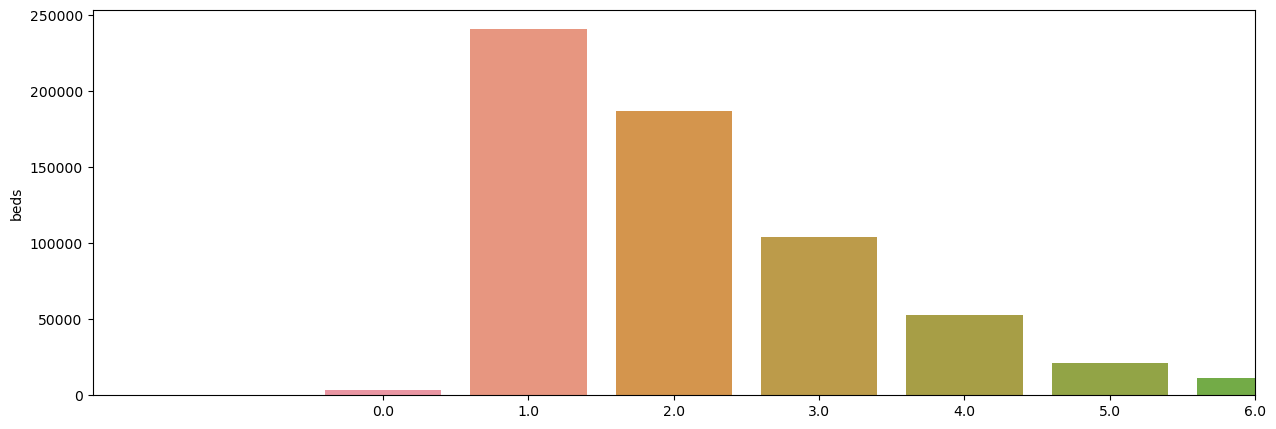

In [63]:
#beds:
diagrama_caixa(base_airbnb_df['beds'])
grafico_barra(base_airbnb_df['beds'])

In [64]:
#Excluindo da análise casas que fujam do "padrão comum":
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'beds')
print(f'{linhas_removidas} linhas removidas')

5622 linhas removidas


<AxesSubplot:ylabel='guests_included'>

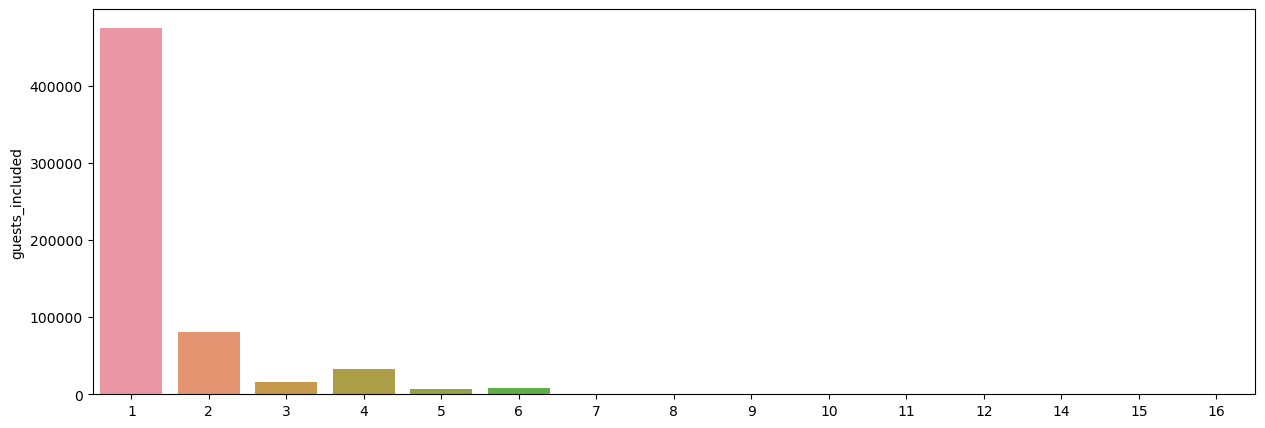

In [65]:
#guest_included:
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb_df['guests_included'].value_counts().index, y=base_airbnb_df['guests_included'].value_counts())

In [66]:
#Excluindo essa coluna da análise pois parece que os usuários do airbnb usam muito o valor padrão do airbnb como 1 guest included. Isso pode levar o modelo a considerar uma feature que na verdade não é essencial para a definição do preço.
base_airbnb_df = base_airbnb_df.drop('guests_included', axis=1)

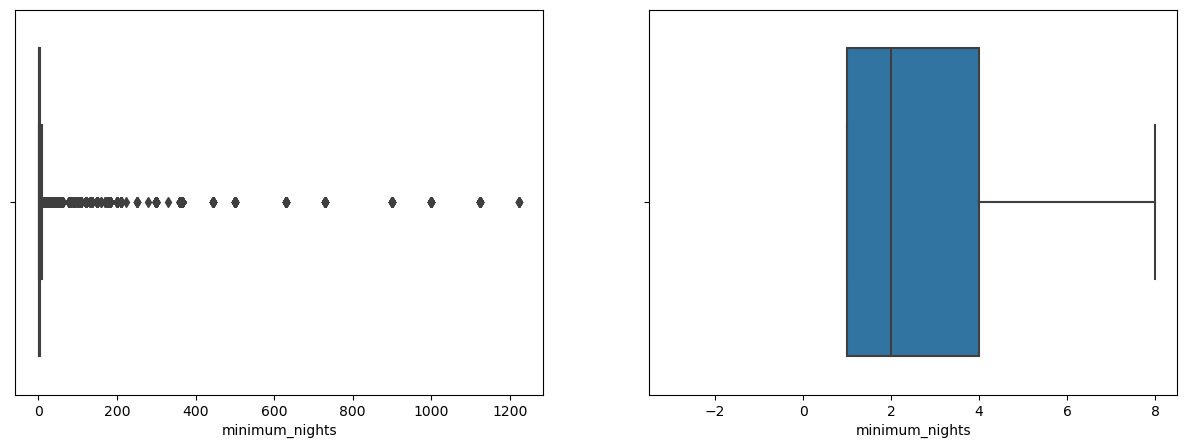

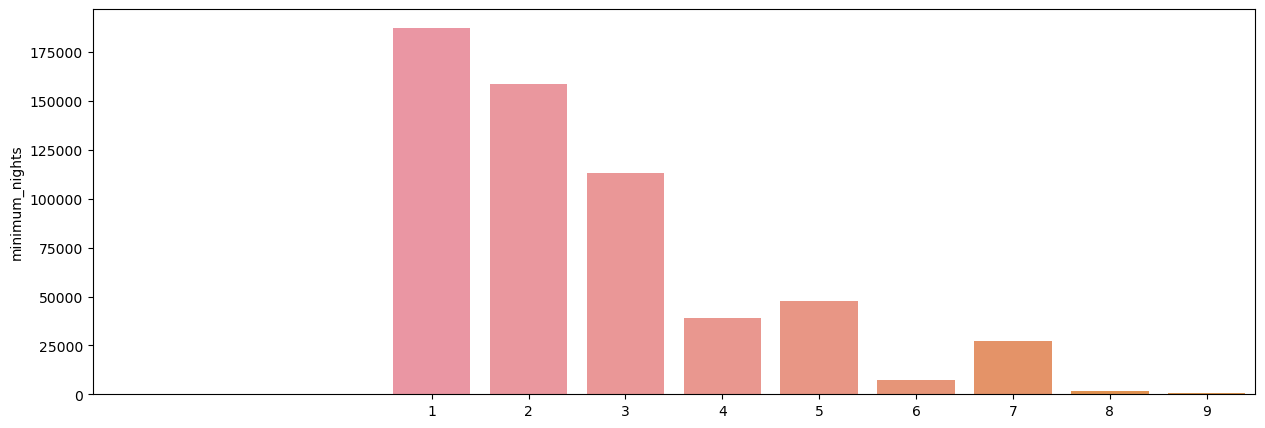

In [67]:
#minimun_nights:
diagrama_caixa(base_airbnb_df['minimum_nights'])
grafico_barra(base_airbnb_df['minimum_nights'])

In [68]:
#Excluindo os outliers dessa coluna porque imóveis com mais de 8 noites como o "mínimo de noites" podem ser de temporada ou ainda imóveis para moradia, em que o host exige pelo menos 1 mês no apartamento. Não condizendo com a análise que queremos desenvolver no modelo.

base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'minimum_nights')
print(f'{linhas_removidas} linhas removidas')

40383 linhas removidas


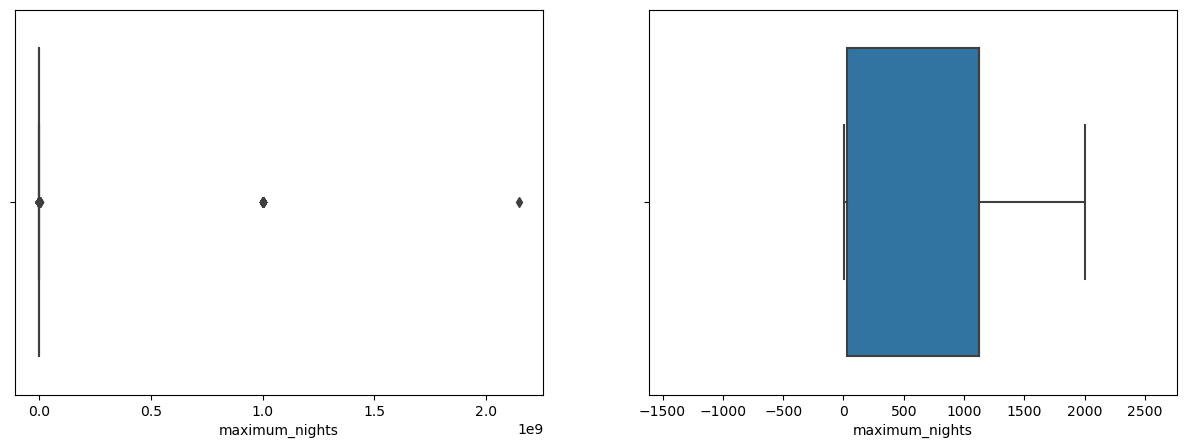

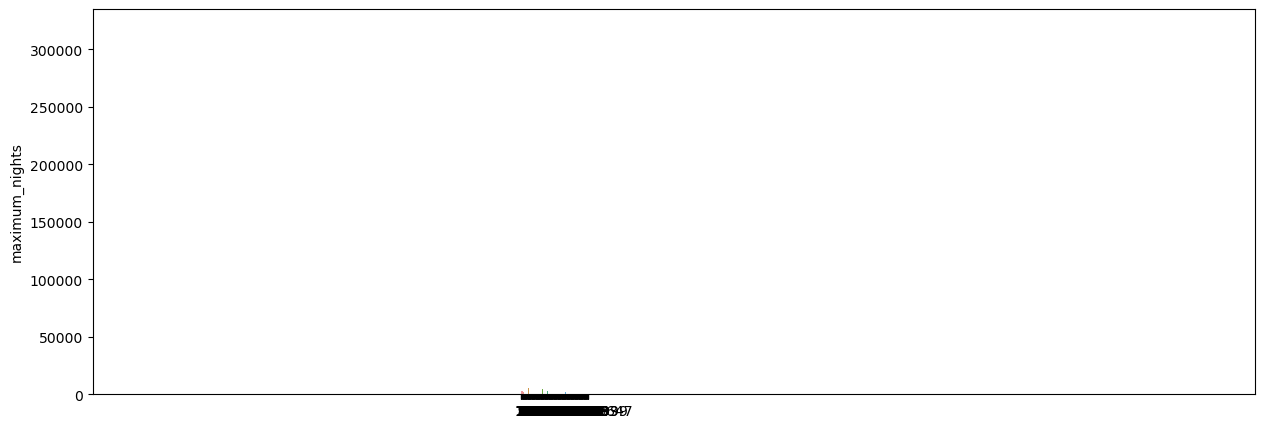

In [69]:
#maximum_nights:
diagrama_caixa(base_airbnb_df['maximum_nights'])
grafico_barra(base_airbnb_df['maximum_nights'])

In [70]:
#Excluindo essa coluna da análise pois parece que quase todos os hosts não preenchem esse campo, não contribuindo assim para a análise.
base_airbnb_df = base_airbnb_df.drop('maximum_nights', axis=1)

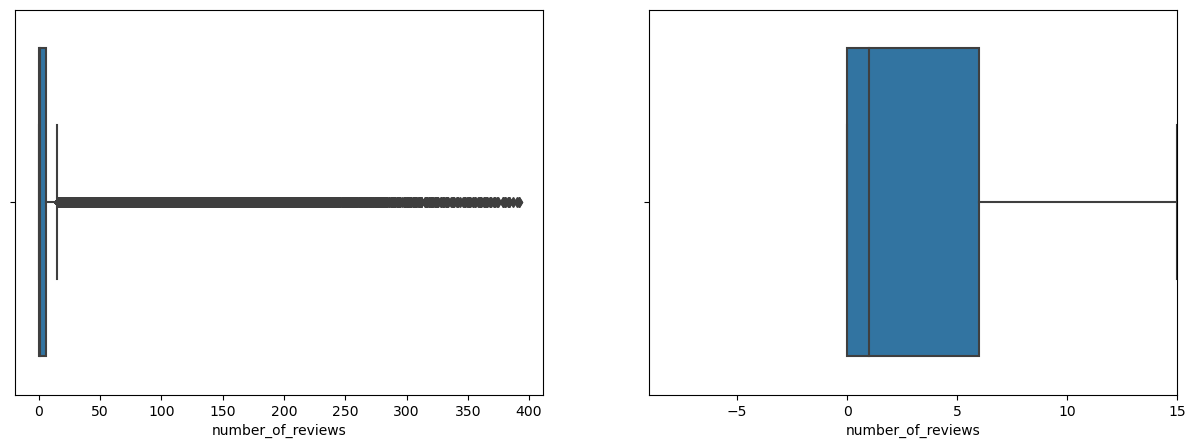

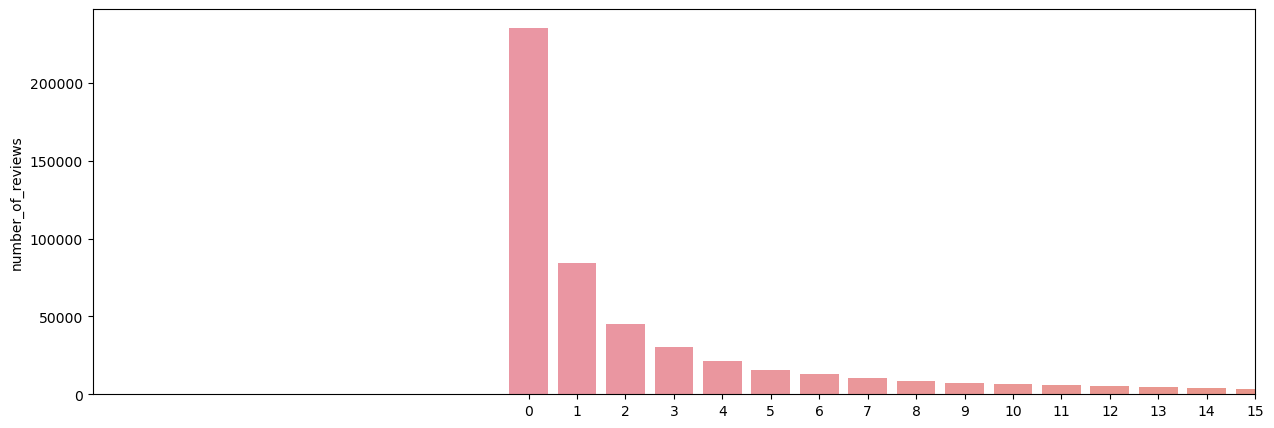

In [71]:
#number_of_reviews:
diagrama_caixa(base_airbnb_df['number_of_reviews'])
grafico_barra(base_airbnb_df['number_of_reviews'])

In [72]:
#Optei por remover essa característica da análise por alguns motivos:
    # Se excluir apenas os outliers, as pessoas que tem a maior quantidade de reviews (o que normalmente são os hosts que têm mais aluguel) serão excluídas da análise e isso pode impactar muito negativamente o modelo.
    #Pensando de acordo com o objetivo, se se eu tenho um imóvel parado e quero colocar meu imóvel disponível, eu não terei review nenhuma de início. Por isso, tirar essa característica da análise pode acabar ajudando.
    #Tenho dúvidas se essa característica deve impactar ou não no preço final.

base_airbnb_df = base_airbnb_df.drop('number_of_reviews', axis=1)

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

d:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


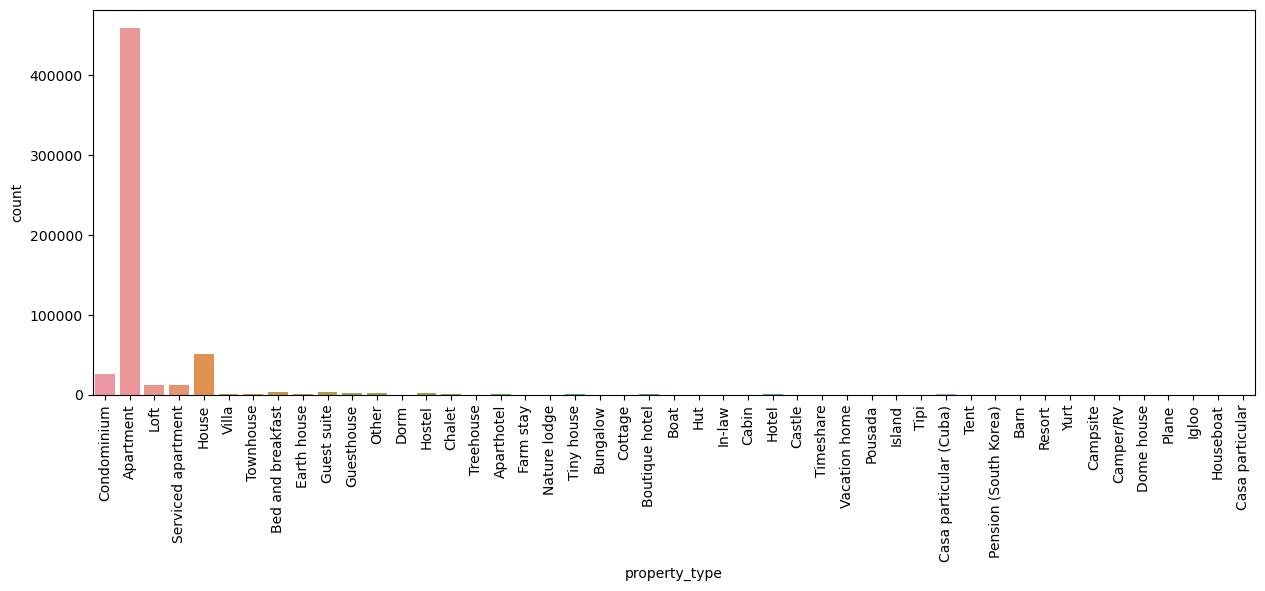

In [73]:
#property_type:

print(base_airbnb_df['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb_df)
grafico.tick_params(axis='x', rotation=90)

Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Others                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


d:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


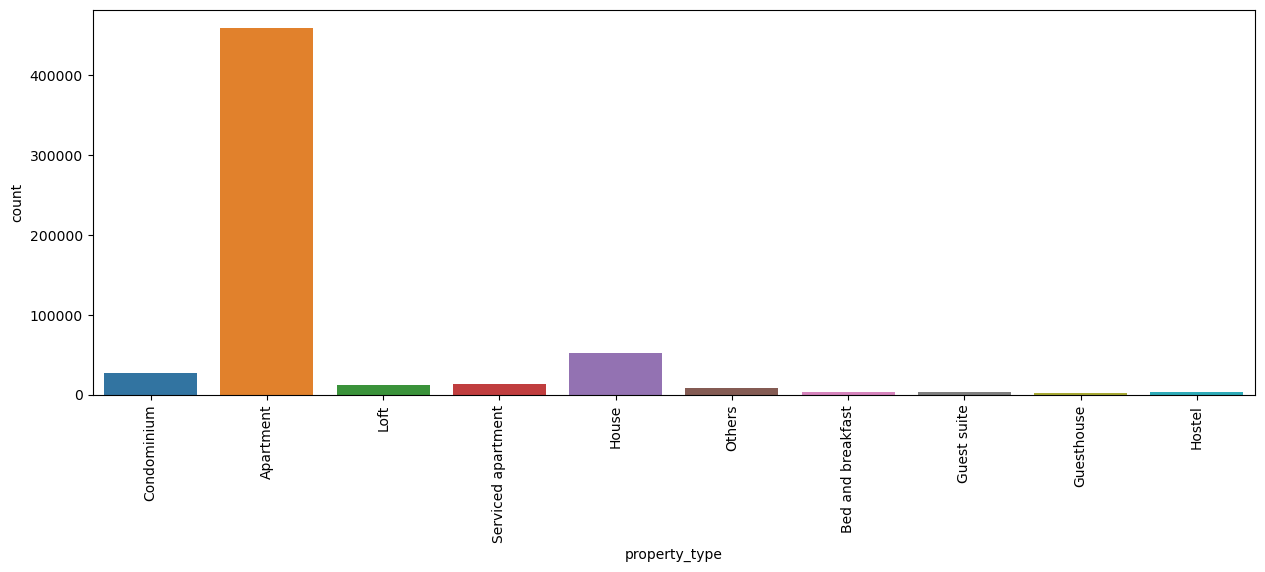

In [74]:
#Agrupar valores que são muito pequenos em um mesmo tipo de propriedade. Propriedades com menos de 2000 valores na base de dadas serão agrupadas dentro do grupo "others":

tabela_tipos_casa = base_airbnb_df['property_type'].value_counts()
colunas_agrupar = [tipo for tipo in tabela_tipos_casa.index if tabela_tipos_casa[tipo] < 2000]

for tipo in colunas_agrupar:
    base_airbnb_df.loc[base_airbnb_df['property_type']==tipo, 'property_type'] = 'Others'

print(base_airbnb_df['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb_df)
grafico.tick_params(axis='x', rotation=90)

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


d:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


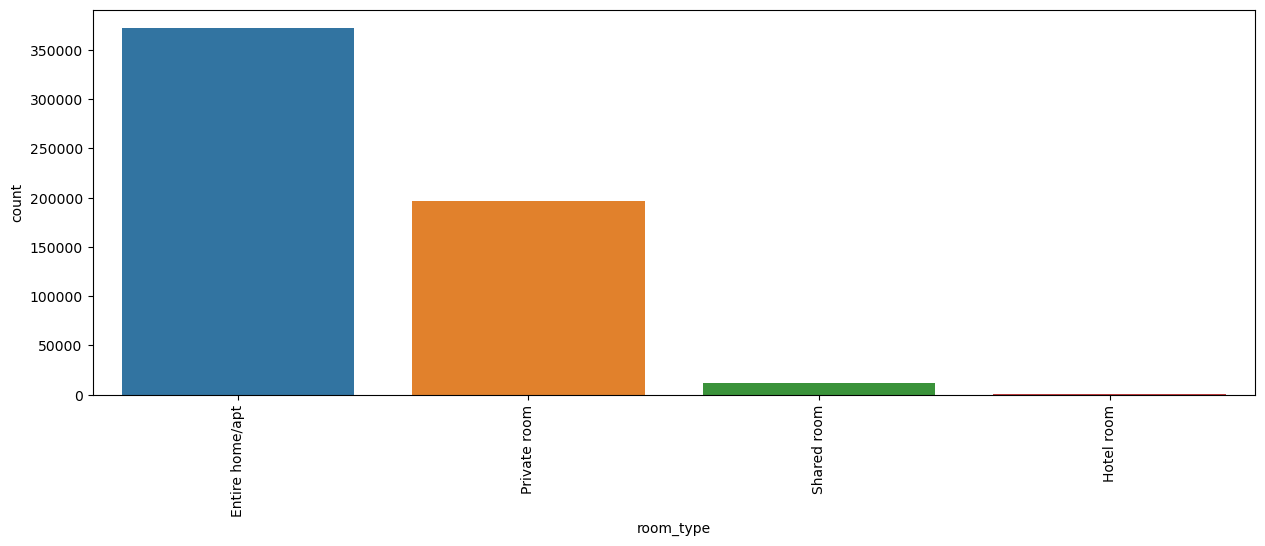

In [75]:
#room_type:
print(base_airbnb_df['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('room_type', data=base_airbnb_df)
grafico.tick_params(axis='x', rotation=90)

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64


d:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


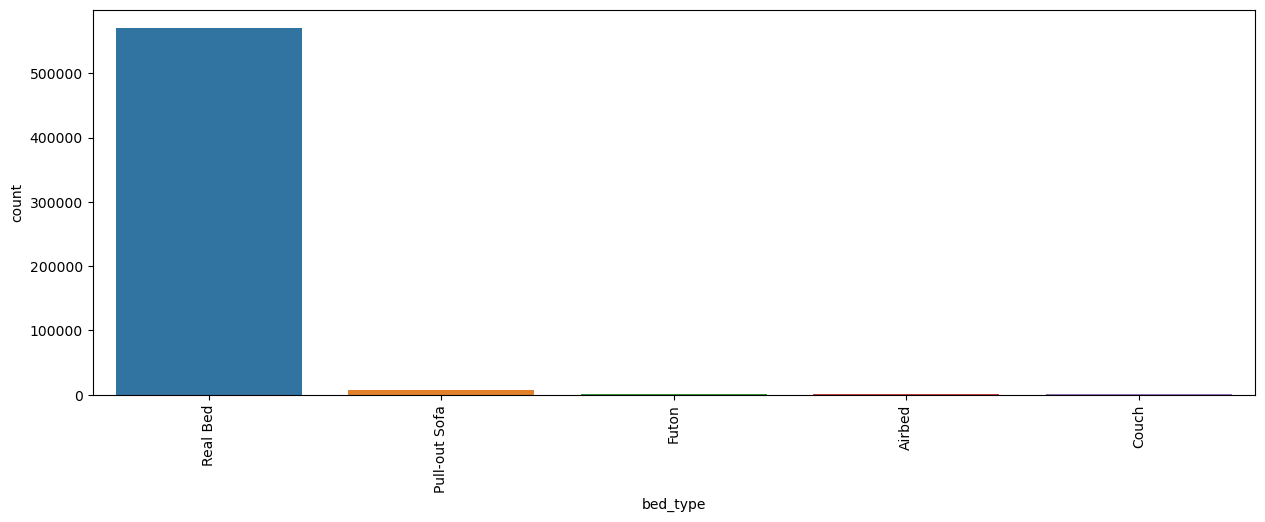

In [76]:
#bed_type:
print(base_airbnb_df['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb_df)
grafico.tick_params(axis='x', rotation=90)

Real Bed    570643
Others       11340
Name: bed_type, dtype: int64


d:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


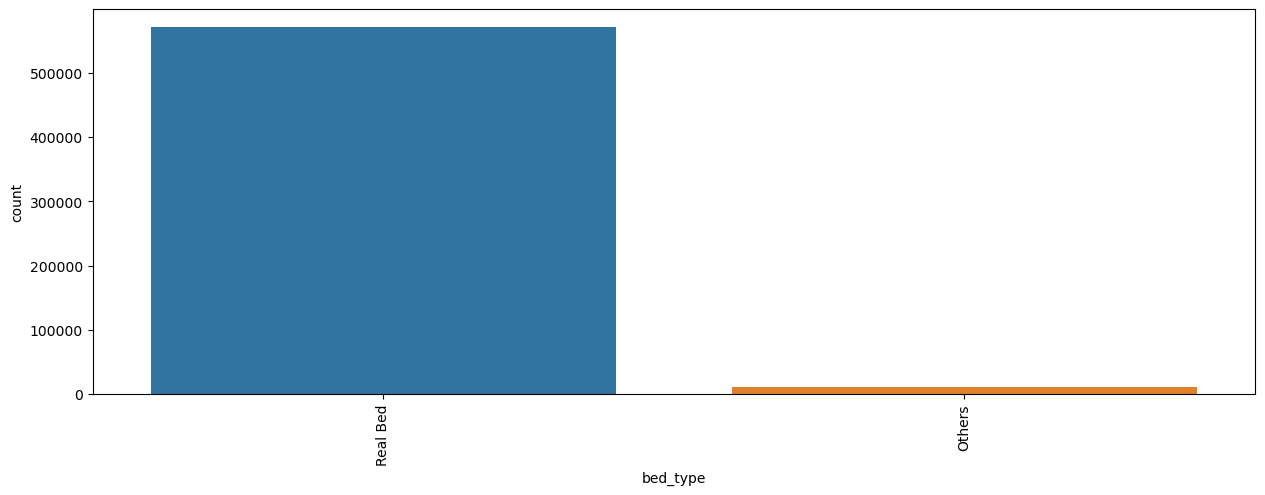

In [77]:
#Agrupando categorias de bed_type:
    #Agrupar valores que são muito pequenos em um único valor. Como há 1 valor muito maior do que todos os outros, todas as categorias fora de Real Bed serão agrupadas em Others para simplificar o modelo.

tabela_bed = base_airbnb_df['bed_type'].value_counts()
colunas_agrupar = [tipo for tipo in tabela_bed.index if tabela_bed[tipo] < 10000]

for tipo in colunas_agrupar:
    base_airbnb_df.loc[base_airbnb_df['bed_type']==tipo, 'bed_type'] = 'Others'

print(base_airbnb_df['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb_df)
grafico.tick_params(axis='x', rotation=90)

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64


d:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


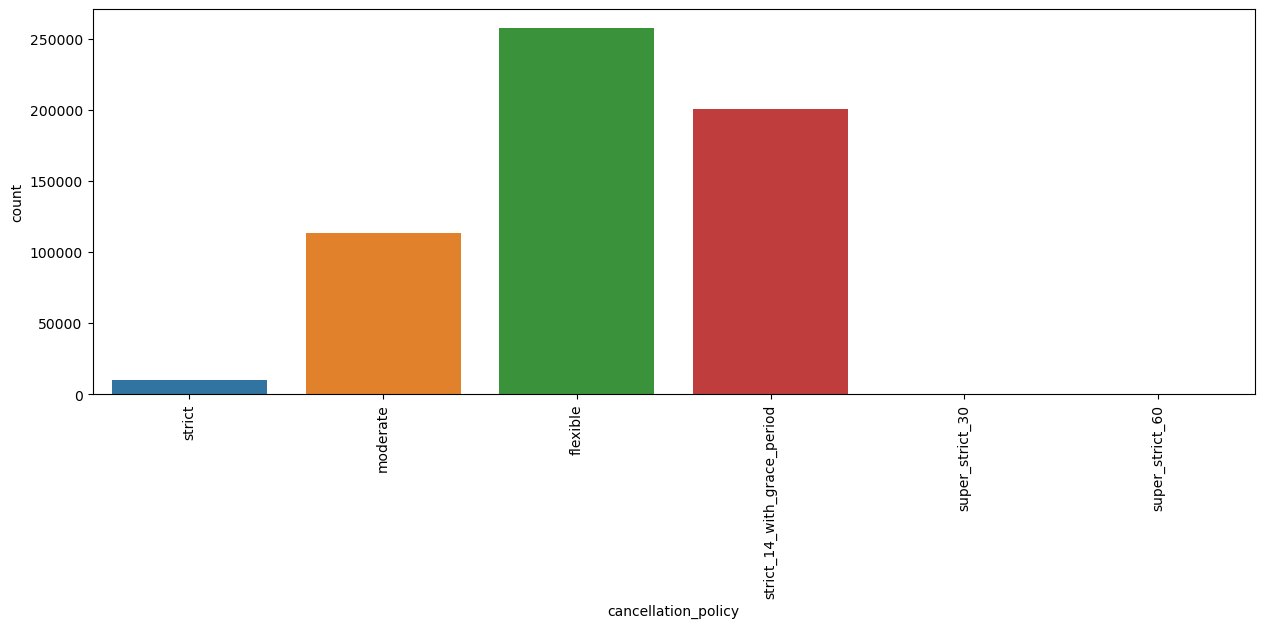

In [78]:
#cancellation_policy:
print(base_airbnb_df['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb_df)
grafico.tick_params(axis='x', rotation=90)

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64


d:\Users\diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


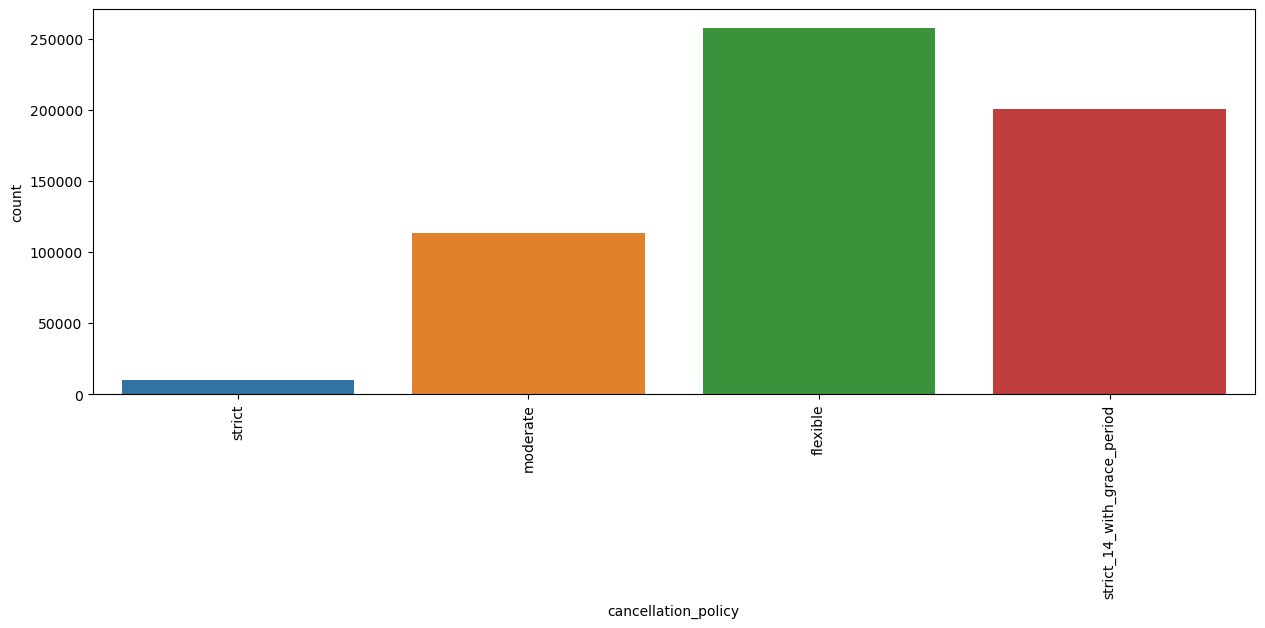

In [79]:
#Agrupar categorias de cancellation_pollicy
    #Simplificar o modelo agrupando as categoria de strict e super_strict em uma única devido aos poucos números de dados delas.
tabela_cancellation = base_airbnb_df['cancellation_policy'].value_counts()
colunas_agrupar = [tipo for tipo in tabela_cancellation.index if tabela_cancellation[tipo] < 10000]

for tipo in colunas_agrupar:
    base_airbnb_df.loc[base_airbnb_df['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'

print(base_airbnb_df['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb_df)
grafico.tick_params(axis='x', rotation=90)

In [80]:
#Criar uma coluna com número de amenities e excluir a antiga coluna de amenities:
base_airbnb_df['n_amenities'] = base_airbnb_df['amenities'].str.split(',').apply(len)
base_airbnb_df = base_airbnb_df.drop('amenities', axis=1)

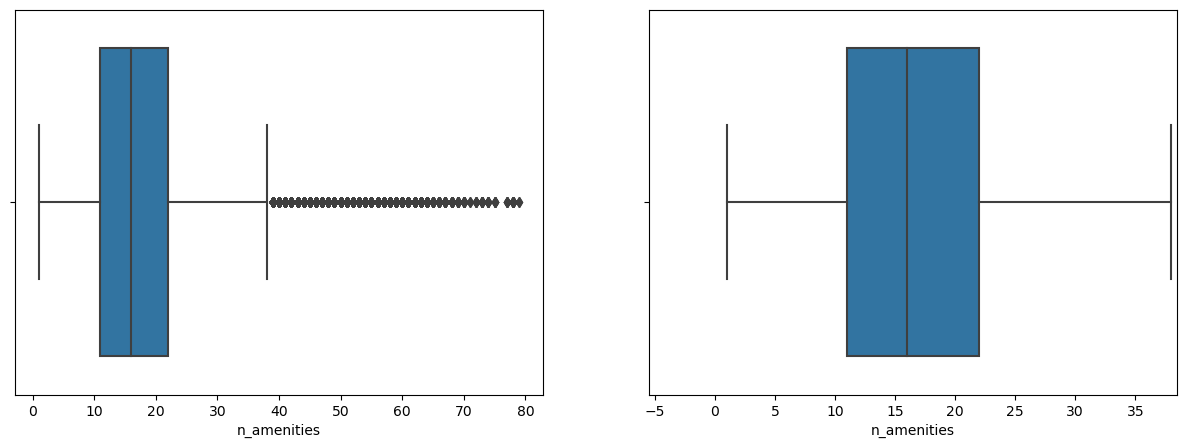

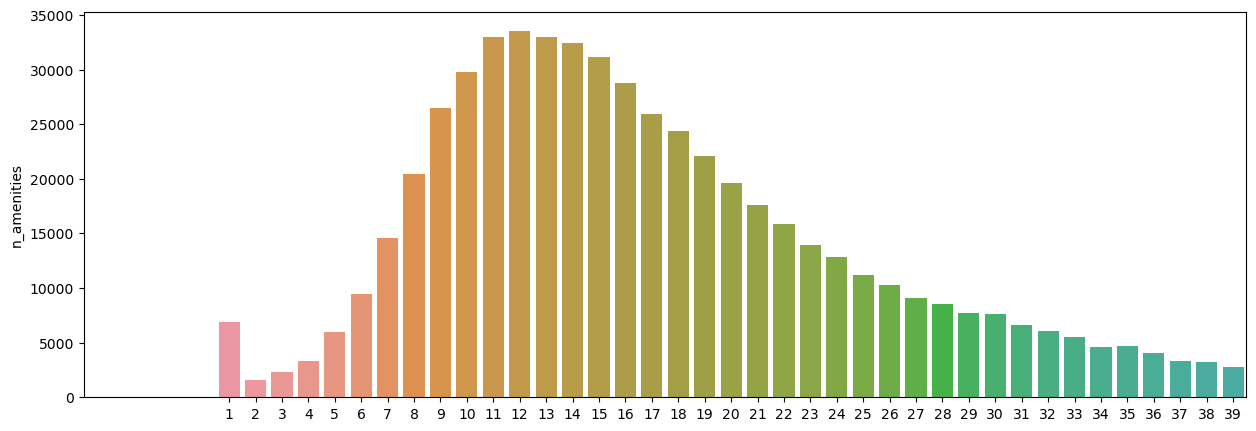

In [82]:
diagrama_caixa(base_airbnb_df['n_amenities'])
grafico_barra(base_airbnb_df['n_amenities'])

In [83]:
#Removendo os outliers dos amenities:
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'n_amenities')
print(f'{linhas_removidas} linhas removidas.')

24343 linhas removidas.
